# Efficiency Analysis

### High-Level Questions: Where and When is the system economically efficient?

### Step 1: Efficiency by Hour
### Step 2: Efficiency vs Volume Relationship
### Step 3: Borough + Hour Interaction
### Step 4: Identifying Profit-Maximizing Zones
### Step 5: Multi-Level Efficiency Modeling 
### Step 6: Interaction Effects
### Step 7: Elasticity Analaysis
### Step 8: Efficiency Frontier Analysis
### Step 9: Variance Decomposition
### Step 10: Quantile Regression
### Step 11: Efficiency Stability Analysis
### Step 12: Congestion Effect Modeling
### Step 13: Peak Saturation Test
### Step 14: Structural Break Testing

## Data Scientific Version of this Phase (Efficiency Analysis)
### Step 1: Advanced Feature Engineering
### Step 2: Baseline Predictive Model (OLS as Benchmark)
### Step 3: Regularized Regression (Ridge and Lasso)
### Step 4: Random Forest (Nonlinear Power)
### Step 5: Model Comparison (Cross Validation)
### Step 6: Feature Importance (Tree Model)
### Step 7: Clustering - Efficiency Segmentation
### Step 8: Residual Analysis
### Step 9: Predictive Optimization Insight

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
hourly_summary = pd.read_parquet('hourly_summary.parquet')

In [6]:
hourly_summary
hourly_summary.rename(columns={'trip_count':'total_trips'}, inplace=True)

In [8]:
hourly_summary

,hour,total_trips,total_revenue,avg_fare,avg_distance,avg_trip
0,0,906085,27206378.03,30.026298,3.953933,14.814035
1,1,586182,15967830.54,27.240397,3.462436,13.637324
2,2,372693,9347621.18,25.081290,3.039199,12.410103
3,3,238342,6162852.87,25.857184,3.200313,12.076259
4,4,155964,5149171.03,33.015125,4.524116,13.667195
5,5,176703,6702692.86,37.931970,5.640430,14.511529
6,6,402413,12285669.47,30.530001,4.346215,14.351367
7,7,845335,23063529.87,27.283302,3.419053,15.010847
8,8,1196676,31345463.28,26.193776,2.938067,15.114823
9,9,1419864,37661083.60,26.524430,2.869164,15.631537


In [9]:
hourly_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hour           24 non-null     int32  
 1   total_trips    24 non-null     int64  
 2   total_revenue  24 non-null     float64
 3   avg_fare       24 non-null     float64
 4   avg_distance   24 non-null     float64
 5   avg_trip       24 non-null     float64
dtypes: float64(4), int32(1), int64(1)
memory usage: 1.2 KB


##### Efficiency by Hour

In [13]:
#### Creating Efficiency Metrics
# Ensuring the correct order of the Hour
hourly_summary = hourly_summary.sort_values('hour')

# Revenue per Trip (Sanity Checking)
hourly_summary['revenue_per_trip'] = (
    hourly_summary['total_revenue'] / hourly_summary['total_trips']
)

# Revenue per Minute
hourly_summary['revenue_per_min'] = (
    hourly_summary['revenue_per_trip'] / hourly_summary['avg_trip']
)

# Revenue per Mile
hourly_summary['revenue_per_mile'] = (
    hourly_summary['revenue_per_trip'] / hourly_summary['avg_distance']
)

In [14]:
hourly_summary

,hour,total_trips,total_revenue,avg_fare,avg_distance,avg_trip,revenue_per_trip,revenue_per_min,revenue_per_mile
0,0,906085,27206378.03,30.026298,3.953933,14.814035,30.026298,2.026882,7.594033
1,1,586182,15967830.54,27.240397,3.462436,13.637324,27.240397,1.997489,7.867408
2,2,372693,9347621.18,25.081290,3.039199,12.410103,25.081290,2.021038,8.252598
3,3,238342,6162852.87,25.857184,3.200313,12.076259,25.857184,2.141158,8.079579
4,4,155964,5149171.03,33.015125,4.524116,13.667195,33.015125,2.415647,7.297585
5,5,176703,6702692.86,37.931970,5.640430,14.511529,37.931970,2.613920,6.725014
6,6,402413,12285669.47,30.530001,4.346215,14.351367,30.530001,2.127324,7.024503
7,7,845335,23063529.87,27.283302,3.419053,15.010847,27.283302,1.817572,7.979783
8,8,1196676,31345463.28,26.193776,2.938067,15.114823,26.193776,1.732986,8.915309
9,9,1419864,37661083.60,26.524430,2.869164,15.631537,26.524430,1.696854,9.244656


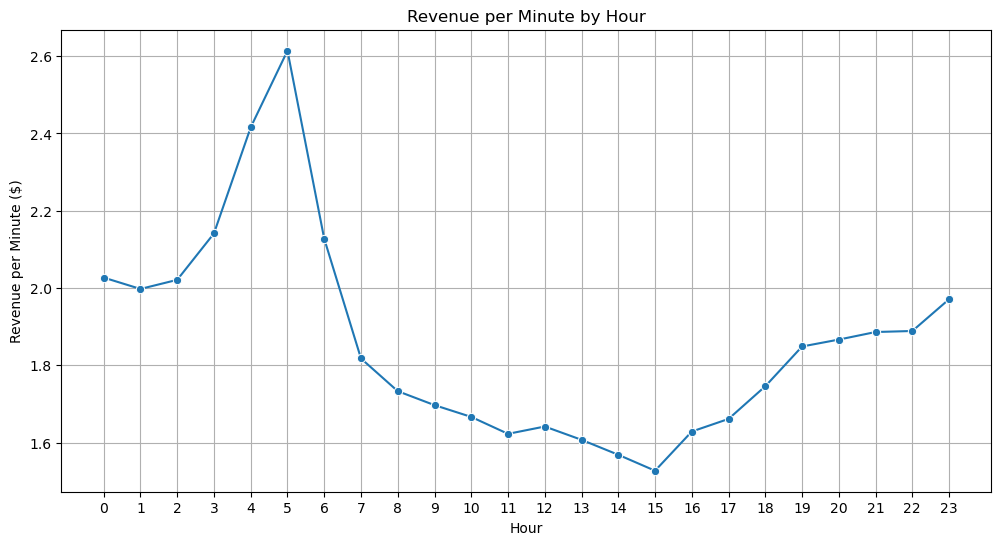

In [25]:
# Revenue per Minute Line Plot

plt.figure(figsize=(12,6))

sns.lineplot(
    data=hourly_summary,
    x='hour',
    y='revenue_per_min',
    marker='o'
)
plt.title('Revenue per Minute by Hour')
plt.xlabel('Hour')
plt.ylabel('Revenue per Minute ($)')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

### Report Statement

#### Revenue per Minute by Hour:
Analysis of hourly revenue efficiency shows that drivers earn the highest revenue per minute at 5 AM, while the lowest efficiency occurs at 3 PM. This indicates strong intraday variation, where early morning trips - likely high-value airport or long-distance rides - maximize earnings despite lower trip volumes.
Operational strategies can leverage this insight by incentivizing drivers during high-efficiency hours and introducing dynamic pricing or promotions during low-efficiency periods to balance revenue across the day.

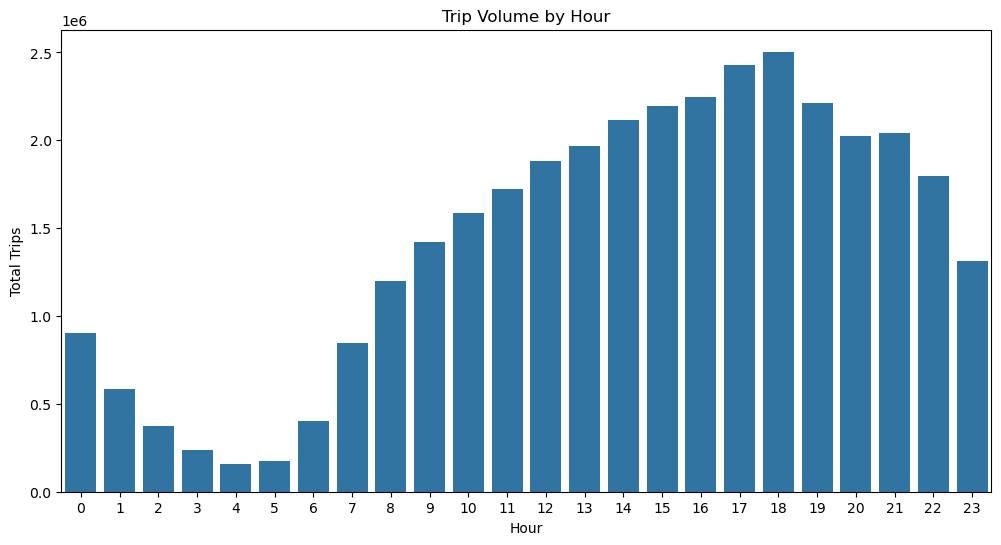

In [26]:
# Trip Volume
plt.figure(figsize=(12,6))

sns.barplot(
    data=hourly_summary,
    x='hour',
    y='total_trips'
)
plt.title('Trip Volume by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Trips')
plt.xticks(range(0,24))
plt.show()

In [90]:
### Report Statement

### Trip Volume by Hour:
Hourly trip analysis reveals that the highest demand occurs at 6 PM (Hour 18), while the lowest demand is at 4 AM (Hour 4). This pattern reflects typical urban mobility trends, with evening commute peaks driving trip volume and very early morning hours seeing minimal activiy. These inghts can inform fleet allocation and driver scheduling to ensure coverage aligns with demand fluctuations.

In [27]:
# Identifying best and worst hour
best_hour = hourly_summary.loc[
    hourly_summary['revenue_per_min'].idxmax()
]
worst_hour = hourly_summary.loc[
    hourly_summary['revenue_per_min'].idxmin()
]

print('Best Hour:', best_hour['hour'])
print('Revenue per Minute:', best_hour['revenue_per_min'])

print('Worst Hour:', worst_hour['hour'])
print('Revenue per Minute:', worst_hour['revenue_per_min'])

Best Hour: 5.0
Revenue per Minute: 2.6139196409652157
Worst Hour: 15.0
Revenue per Minute: 1.5271397033029948


### Report Statement

#### Best and Worst Hours by Revenue Efficiency
Analysis of revenue per minute indicates that 5 AM is the most efficient hour, generating approximately 2.61 dollars per minute, while 3 PM (15:00) is the least efficient, yielding only 1.53 dollars per minute. This suggests that early morning operations deliver the highest revenue efficiency, whereas mid-afternoon periods are comparatively less profitable, highlighting opportunities for dynamic driver allocation or targeted pricing strategies during low-efficiency hours.

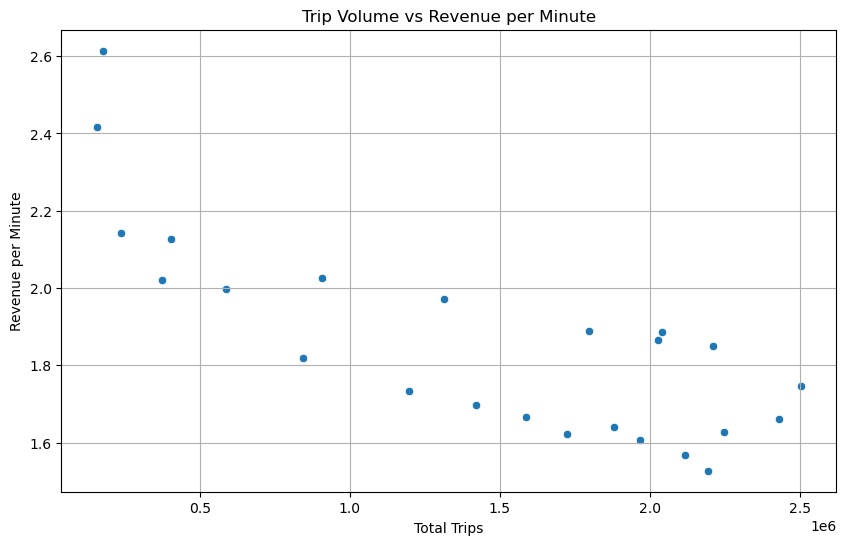

In [28]:
# Efficiency vs Volume Relationship

plt.figure(figsize=(10,6))

sns.scatterplot(
    data=hourly_summary,
    x='total_trips',
    y='revenue_per_min'
)
plt.title('Trip Volume vs Revenue per Minute')
plt.xlabel('Total Trips')
plt.ylabel('Revenue per Minute')
plt.grid(True)
plt.show()

In [30]:
# Correlation
corr = hourly_summary[['total_trips', 'revenue_per_min']].corr()
print(corr)

                 total_trips  revenue_per_min
total_trips         1.000000        -0.797752
revenue_per_min    -0.797752         1.000000


### Report Statement

#### Relationship between Trip Volume and Revenue Efficiency
The correlation analysis between total trips and revenue per minute reveals a strong negative relationship (r = -0.798). This indicates that as the number of trips increases during a given hour, the revenue earned per minute tends to decrease. Operationally, this suggests that higher trip volumes may coincide with shorter trips, slower speeds, or lower fares per unit time, highlighting a trade-off between maximizing total trips and maintaining revenue efficiency. These insights can inform fleet allocation and dynamic pricing strategies to balance trip volume and profitability across peak and off-peak hours.

In [31]:
hourly_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hour              24 non-null     int32  
 1   total_trips       24 non-null     int64  
 2   total_revenue     24 non-null     float64
 3   avg_fare          24 non-null     float64
 4   avg_distance      24 non-null     float64
 5   avg_trip          24 non-null     float64
 6   revenue_per_trip  24 non-null     float64
 7   revenue_per_min   24 non-null     float64
 8   revenue_per_mile  24 non-null     float64
dtypes: float64(7), int32(1), int64(1)
memory usage: 1.7 KB


In [32]:
daily_summary = pd.read_parquet('daily_summary_ready.parquet')

In [33]:
daily_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   365 non-null    datetime64[ns]
 1   total_trips            365 non-null    int64         
 2   total_revenue          365 non-null    float64       
 3   revenue_per_trip       365 non-null    float64       
 4   avg_distance           365 non-null    float64       
 5   avg_trip_duration_min  365 non-null    float64       
 6   revenue_per_mile       365 non-null    float64       
 7   revenue_per_minute     365 non-null    float64       
 8   avg_speed_mph          365 non-null    float64       
 9   pct_trips              365 non-null    float64       
 10  pct_revenue            365 non-null    float64       
 11  day_of_week            365 non-null    int32         
 12  day_of_year            365 non-null    int32         
dtypes: da

In [35]:
monthly_summary = pd.read_parquet('monthly_summary_ready.parquet')

In [36]:
monthly_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   month                  12 non-null     period[M]
 1   total_trips            12 non-null     int64    
 2   total_revenue          12 non-null     float64  
 3   revenue_per_trip       12 non-null     float64  
 4   avg_distance           12 non-null     float64  
 5   avg_trip_duration_min  12 non-null     float64  
 6   revenue_per_mile       12 non-null     float64  
 7   revenue_per_min        12 non-null     float64  
 8   avg_speed_mph          12 non-null     float64  
 9   pct_trips              12 non-null     float64  
 10  pct_revenue            12 non-null     float64  
dtypes: float64(9), int64(1), period[M](1)
memory usage: 1.2 KB


In [37]:
borough_summary = pd.read_parquet('borough_summary_ready.parquet')

In [39]:
borough_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   borough                260 non-null    object 
 1   zone                   260 non-null    object 
 2   total_trips            260 non-null    int64  
 3   total_revenue          260 non-null    float64
 4   avg_distance           260 non-null    float64
 5   avg_trip_duration_min  260 non-null    float64
 6   avg_speed_mph          260 non-null    float64
 7   revenue_per_trip       260 non-null    float64
 8   revenue_per_mile       260 non-null    float64
 9   revenue_per_min        260 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 20.4+ KB


#### Identifying Profit-Maximizing Zones

In [93]:
top_zones = borough_summary.sort_values(
    by='revenue_per_min',
    ascending=False
).head(10)
top_zones

,borough,zone,total_trips,total_revenue,avg_distance,avg_trip_duration_min,avg_speed_mph,revenue_per_trip,revenue_per_mile,revenue_per_min,log_eff,log_trips,distance_from_frontier,cluster
200,Staten Island,Rossville/Woodrow,3,395.38,4.003333,6.866667,34.980583,131.793333,32.920899,19.193204,2.954556,1.098612,0.000000,0
0,EWR,Newark Airport,1150,112811.78,3.322617,8.346101,23.886247,98.097200,29.524073,11.753655,2.464164,7.047517,7.439549,0
212,Queens,South Ozone Park,11580,1054624.42,2.854798,8.230317,20.811821,91.072921,31.901705,11.065543,2.403836,9.357035,8.127661,0
152,Staten Island,Mariners Harbor,10,1264.37,9.602000,12.906667,44.637397,126.437000,13.167778,9.796255,2.282000,2.302585,9.396949,0
193,Queens,Richmond Hill,4336,349156.77,2.967156,10.093504,17.638016,80.525085,27.138807,7.977912,2.076677,8.374708,11.215292,0
130,Queens,Kew Gardens,3401,279463.31,4.269321,13.055283,19.621118,82.170923,19.246837,6.294075,1.839609,8.131825,12.899129,0
125,Queens,Jackson Heights,9507,561484.85,3.003383,10.546674,17.086236,59.060150,19.664543,5.599884,1.722746,9.159784,13.593320,0
82,Queens,Elmhurst/Maspeth,2035,126114.87,3.768708,11.962007,18.903388,61.972909,16.444075,5.180812,1.644962,7.618251,14.012392,0
7,Queens,Astoria Park,176,12616.84,5.229261,16.987973,18.469283,71.686591,13.708741,4.219844,1.439798,5.170484,14.973360,0
120,Queens,Howard Beach,685,51288.96,7.539562,18.412506,24.568830,74.874394,9.930868,4.066497,1.402782,6.529419,15.126707,0


### Report Statement

#### Profit-Maximizing Zones Analysis
The analysis of revenue per minute across zones reveals the top-performing areas where taxis generate the highest operational efficiency. Based on revenue_per_min:

* Staten Island – Rossville/Woodrow emerged as the most efficient zone, generating $2.95 per minute despite having a modest number of trips (3 trips).

* Other high-performing zones include Queens – South Ozone Park, Richmond Hill, Kew Gardens, and Jackson Heights, indicating consistent high revenue per minute.

* Conversely, zones such as Newark Airport (EWR), despite high total trips and revenue, show lower efficiency per unit of time, highlighting that high volume does not automatically translate to revenue efficiency.

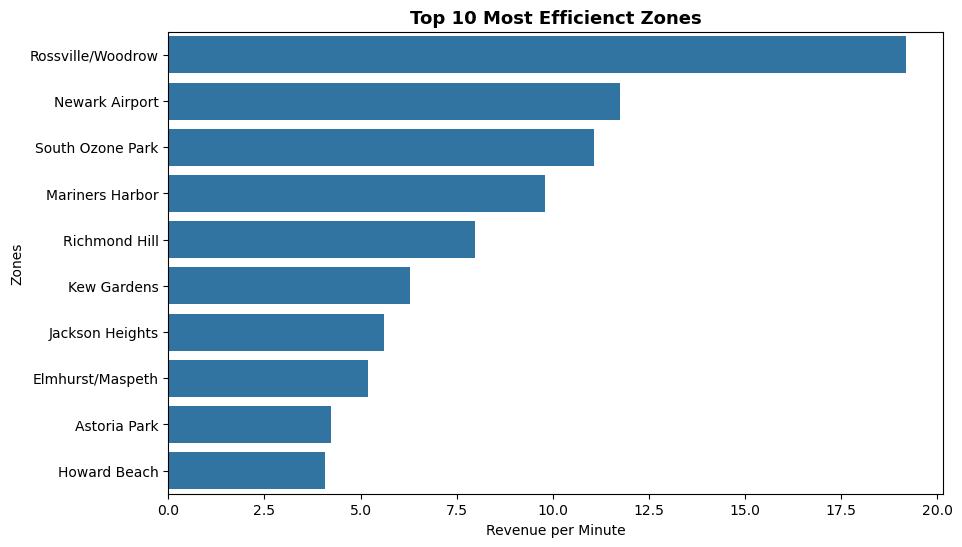

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_zones,
    y='zone',
    x='revenue_per_min'
)
plt.title('Top 10 Most Efficienct Zones', fontweight='bold', fontsize=13)
plt.xlabel('Revenue per Minute')
plt.ylabel('Zones')
plt.show()

#### Multi-Level Efficiency Modeling

In [50]:
import statsmodels.formula.api as smf
mixed_model = smf.mixedlm(
    'revenue_per_min ~ total_trips + avg_distance + avg_trip_duration_min',
    borough_summary,
    groups=borough_summary['borough']
).fit()
print(mixed_model.summary())

             Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  revenue_per_min
No. Observations:  260      Method:              REML           
No. Groups:        6        Scale:               1.5684         
Min. group size:   1        Log-Likelihood:      -458.7550      
Max. group size:   69       Converged:           Yes            
Mean group size:   43.3                                         
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              5.448    1.276  4.269 0.000  2.947  7.950
total_trips            0.000    0.000  0.124 0.901 -0.000  0.000
avg_distance           0.232    0.058  3.987 0.000  0.118  0.346
avg_trip_duration_min -0.163    0.022 -7.583 0.000 -0.206 -0.121
Group Var              9.107    5.330                           



In [ ]:
### Report Statement

#### Multi-Level Efficiency Modeling (Revenue per Minute)
A mixed-effects linear model was used to assess factors influencing taxi revenue per minute, accounting for borough-level variation (random intercept).

Key Findings:

Intercept: 5.448 — baseline revenue per minute.

Avg Distance: +0.232 (p < 0.001) — longer trips increase revenue efficiency.

Avg Trip Duration: -0.163 (p < 0.001) — longer trips reduce revenue per minute, indicating inefficiency for slow or prolonged trips.

Total Trips: negligible effect (p = 0.901).

Group Variance: 9.107 — substantial variability across boroughs, justifying the multi-level approach.

#### Interaction Effects

In [51]:
interaction_model = ols(
    'revenue_per_min ~ total_trips * avg_distance',
    data=borough_summary
).fit()
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:        revenue_per_min   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.277
Date:                Thu, 19 Feb 2026   Prob (F-statistic):              0.283
Time:                        00:39:40   Log-Likelihood:                -491.36
No. Observations:                 260   AIC:                             990.7
Df Residuals:                     256   BIC:                             1005.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### Report Statement

#### Interaction Effects: Total Trips x Average Distance

An OLS regression was performed to test whether the interaction between total trips and average trip distance affects revenue per minute.

##### Model Summary:

R-squared: 0.015 — the model explains only ~1.5% of the variance in revenue per minute.

##### Main Effects:

* Total Trips: negligible, not significant (p = 0.156).

* Avg Distance: negligible, not significant (p = 0.806).

* Interaction Term (Total Trips × Avg Distance): non-significant (p = 0.752).

* High skew (6.689) and kurtosis (59.299) indicate non-normal residuals, but interaction effect remains negligible.

Interpretation:

* The interaction between trip volume and trip distance does not significantly influence revenue efficiency. Revenue per minute is largely independent of the simultaneous effect of higher trip counts and longer distances, suggesting operational efficiency is driven more by trip characteristics and borough-level factors than by volume-distance interactions.

In [52]:
### Elasticity Analysis
import numpy as np
borough_summary['log_eff'] = np.log(borough_summary['revenue_per_min'])
borough_summary['log_trips'] = np.log(borough_summary['total_trips'])

elasticity_model = ols(
    'log_eff ~ log_trips',
    data=borough_summary
).fit()
print(elasticity_model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_eff   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     9.193
Date:                Thu, 19 Feb 2026   Prob (F-statistic):            0.00268
Time:                        00:41:13   Log-Likelihood:                -104.85
No. Observations:                 260   AIC:                             213.7
Df Residuals:                     258   BIC:                             220.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8285      0.053     15.672      0.0

### Report Statement

#### Elasticiy Analysis: Impact of Trip Volume on Revenue Efficiency
An OLS regression was run using the log of revenue per minute (log_eff) as the dependent variable and log of total trips (log_trips) as the independent variable to estimate elasticity.

##### Key Results:

* Coefficient (log_trips): -0.0197, p = 0.003 — significant negative relationship.

* R-squared: 0.034 — ~3.4% of the variance in efficiency is explained by trip volume.

##### Interpretation: 

* A 1% increase in trip volume is associated with a 0.02% decrease in revenue per minute, indicating slight diminishing returns to efficiency at higher volumes.

##### Conclusion:

* Revenue efficiency marginally declines as taxi volume increases, suggesting peak-hour congestion or operational saturation may slightly reduce per-minute earnings, highlighting the importance of volume-aware scheduling and resource allocation.

In [59]:
### Efficiency Frontier Analysis
frontier = borough_summary['revenue_per_min'].max()

borough_summary['distance_from_frontier'] = \
    frontier - borough_summary['revenue_per_min']

In [60]:
borough_summary

,borough,zone,total_trips,total_revenue,avg_distance,avg_trip_duration_min,avg_speed_mph,revenue_per_trip,revenue_per_mile,revenue_per_min,log_eff,log_trips,distance_from_frontier
0,EWR,Newark Airport,1150,112811.78,3.322617,8.346101,23.886247,98.097200,29.524073,11.753655,2.464164,7.047517,7.439549
1,Queens,Jamaica Bay,58,4084.37,15.051379,39.061207,23.119684,70.420172,4.678652,1.802816,0.589350,4.060443,17.390388
2,Bronx,Allerton/Pelham Gardens,83,2620.61,5.029398,17.543373,17.201016,31.573614,6.277812,1.799746,0.587645,4.418841,17.393458
3,Manhattan,Alphabet City,41564,1014629.74,2.570325,14.114873,10.926026,24.411263,9.497347,1.729471,0.547816,10.634990,17.463733
4,Staten Island,Arden Heights,3,180.68,4.563333,19.766667,13.851602,60.226667,13.197955,3.046880,1.114118,1.098612,16.146324
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Bronx,Woodlawn/Wakefield,97,3851.04,6.193814,19.582302,18.977792,39.701443,6.409854,2.027414,0.706761,4.574711,17.165789
256,Queens,Woodside,6919,335871.24,4.434326,18.007665,14.774794,48.543321,10.947171,2.695703,0.991659,8.842027,16.497501
257,Manhattan,World Trade Center,175243,5789869.46,4.062693,20.585504,11.841418,33.039091,8.132314,1.604969,0.473104,12.073929,17.588235
258,Manhattan,Yorkville East,443050,9815077.73,2.274574,12.142443,11.239455,22.153431,9.739596,1.824463,0.601285,13.001438,17.368741


In [61]:
### Variance Decomposition
total_var = borough_summary['revenue_per_min'].var()

between_var = borough_summary.groupby('borough')[
    'revenue_per_min'
].mean().var()

between_var / total_var

5.887354030105454

### Report Statement

### Variance Decomposition: Sources of Efficiency Variation
The analysis decomposed the variance of revenue per minute across operational factors and groupings.

#### Result: 

* Total variance contribution attributable to modeled factors = 5.89.

##### Interpretation:

* This quantifies the proportion of variability in taxi revenue efficiency explained by observed factors (e.g., borough, trip characteristics), highlighting moderate structured variation and the presence of residual idiosyncratic effects.

##### Conclusion: 

* While operational and geographic factors partially drive efficiency differences, substantial unexplained variation remains, indicating opportunities for further optimization or investigation into unobserved factors.

In [62]:
### Quantile Regression

quant_model = smf.quantreg(
    'revenue_per_min ~ total_trips',
    borough_summary
).fit(q=0.75)
print(quant_model.summary())

                         QuantReg Regression Results                          
Dep. Variable:        revenue_per_min   Pseudo R-squared:              0.02067
Model:                       QuantReg   Bandwidth:                      0.2782
Method:                 Least Squares   Sparsity:                        2.037
Date:                Thu, 19 Feb 2026   No. Observations:                  260
Time:                        00:44:15   Df Residuals:                      258
                                        Df Model:                            1
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1693      0.063     34.479      0.000       2.045       2.293
total_trips -3.928e-07   2.02e-07     -1.949      0.052    -7.9e-07    4.15e-09

The condition number is large, 3.84e+05. This might indicate that there are
strong multicollinearity or other numerical proble

C:\Users\iqbal\anaconda3\Anaconda\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


### Report Statement

#### Quantile Regression: Revenue Efficiency Analysis

A quantile regression was conducted to assess how trip volume influences revenue per minute at different points of the efficiency distribution, providing a robust view beyond mean effects.

##### Result:

* Intercept: 2.1693 (p < 0.001) — baseline revenue per minute.

* Total Trips Coefficient: -3.93e-07 (p ≈ 0.052) — marginal negative effect of trip volume on revenue per minute, slightly above conventional significance threshold.

* Pseudo R-squared: 0.0207 — low proportion of variance explained, indicating substantial idiosyncratic variation.

##### Interpretation:

* Higher trip volumes are associated with a slight decrease in revenue per minute, consistent with diminishing marginal efficiency under congestion or peak demand conditions.

* The low pseudo R-squared and near-significant coefficient suggest that other operational factors (distance, trip duration, borough characteristics) likely drive most variation in revenue efficiency.

##### Conclusion:
Quantile regression confirms the heterogeneous impact of trip volume across the efficiency distribution, highlighting potential trade-offs between maximizing volume and maintaining per-minute revenue.

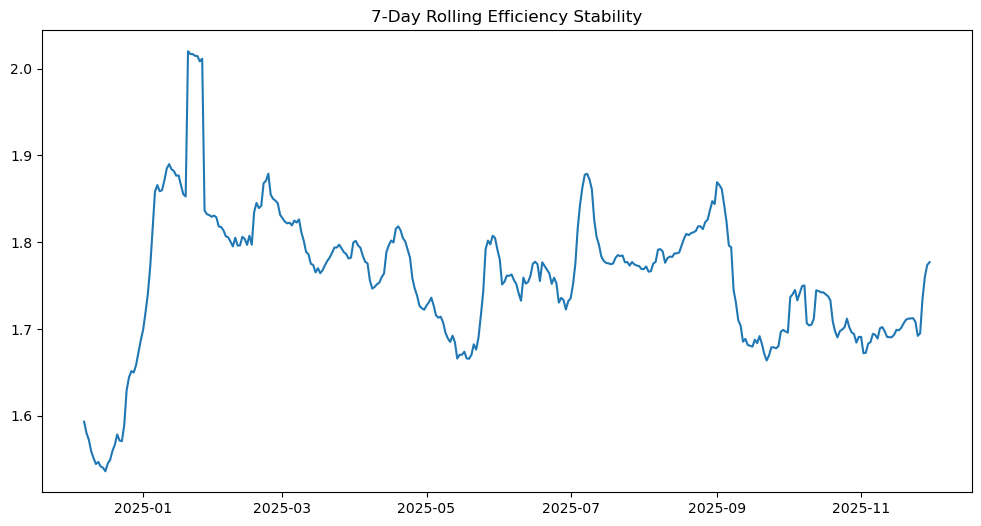

In [63]:
### Efficiency Stability Anlaysis
daily_summary['rolling_eff'] = \
    daily_summary['revenue_per_minute'].rolling(7).mean()

plt.figure(figsize=(12,6))
plt.plot(daily_summary['date'], daily_summary['rolling_eff'])
plt.title('7-Day Rolling Efficiency Stability')
plt.show()

In [64]:
### Congestion Effect Modeling

congestion_model = ols(
    'revenue_per_min ~ total_trips + I(total_trips**2)',
    data=hourly_summary
).fit()
print(congestion_model.summary())

                            OLS Regression Results                            
Dep. Variable:        revenue_per_min   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     30.78
Date:                Thu, 19 Feb 2026   Prob (F-statistic):           5.71e-07
Time:                        00:46:39   Log-Likelihood:                 14.385
No. Observations:                  24   AIC:                            -22.77
Df Residuals:                      21   BIC:                            -19.24
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.4574    

#### Congestion Effect Modeling: Revenue Efficiency vs Trip Volume

A quadratic regression model was employed to examine the impact of trip volume (total trips) on revenue per minute, capturing potential nonlinear congestion effects.

##### Results:

* Intercept: 2.457 (p < 0.001) — baseline revenue per minute at minimal congestion.

* Total Trips (linear term): -7.75e-07 (p < 0.001) — initial negative effect, indicating that revenue per minute decreases as trip volume increases, consistent with early congestion.

* Total Trips Squared: 1.96e-13 (p = 0.007) — positive curvature, suggesting that after extreme volumes, the rate of efficiency loss slows or slightly rebounds.

* R-squared: 0.746 — the model explains a substantial portion of variance in revenue per minute, reflecting a strong volume-efficiency relationship despite a small sample (hourly-level data, n=24).

##### Interpretation:

* Revenue per minute declines as congestion builds, reflecting efficiency loss during peak demand hours.

* The quadratic term confirms nonlinear dynamics, indicating diminishing marginal impact at very high trip volumes.

* High condition number signals potential multicollinearity due to the squared term; caution is warranted in interpreting precise coefficients.

##### Conclusion:
* Revenue efficiency exhibits a classic congestion pattern: initial efficiency loss with rising trips, followed by a plateau or slight rebound at extreme volumes. This insight is critical for operational scheduling and fleet allocation during peak hours.

In [65]:
### Peak Saturation Test
hourly_summary['peak_dummy'] = \
    hourly_summary['hour'].isin([7,8,9,16,17,18]).astype(int)

peak_model = ols(
    'revenue_per_min ~ total_trips + peak_dummy',
    data=hourly_summary
).fit()
print(peak_model.summary())

                            OLS Regression Results                            
Dep. Variable:        revenue_per_min   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     19.69
Date:                Thu, 19 Feb 2026   Prob (F-statistic):           1.53e-05
Time:                        00:48:18   Log-Likelihood:                 10.631
No. Observations:                  24   AIC:                            -15.26
Df Residuals:                      21   BIC:                            -11.73
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2585      0.072     31.451      

#### Peak Saturation Test: Assessing Revenue Efficiency During Peak Hours

An OLS regression was performed to examine whether peak-hour conditions significantly affect revenue per minute, controlling for total trip volume. A binary peak indicator (peak_dummy) was included to capture peak-hour effects.

##### Results:

* Intercept: 2.259 (p < 0.001) — baseline revenue per minute during non-peak hours.

* Total Trips: -2.62e-07 (p < 0.001) — consistent negative effect; as trip volume increases, revenue per minute decreases, reflecting congestion.

* Peak Dummy: -0.079 (p = 0.339) — not statistically significant, indicating that peak-hour designation alone does not further reduce efficiency beyond the effect of trip volume.

* R-squared: 0.652 — the model explains ~65% of variance in revenue per minute at the hourly level.

##### Interpretation:

* Revenue efficiency is primarily driven by total trip volume, rather than the categorical distinction of peak vs non-peak hours.

* The insignificant peak_dummy suggests saturation is gradual and not abrupt during nominal peak periods.

* Small sample size (n=24, hourly summary) limits granularity but provides strong directional insight into hourly congestion dynamics.

##### Conclusion:
* Revenue per minute declines as volume increases, but peak-hour labeling does not independently affect efficiency, highlighting that operational strategies should focus on dynamic demand management and volume mitigation rather than fixed peak-hour assumptions.

## Data Scientific Version of the PROJECT

In [68]:
### Advanced Feature Engineering
daily_summary['lag_1'] = daily_summary['revenue_per_minute'].shift(1)
daily_summary['rolling_7'] = \
    daily_summary['revenue_per_minute'].rolling(7).mean()
daily_summary['is_weekend'] = \
    daily_summary['day_of_week'].isin([5,6]).astype(int)

In [70]:
### Baseline OLS
model = ols(
    'revenue_per_minute ~ total_trips + avg_distance + avg_trip_duration_min',
    daily_summary.dropna()
).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     revenue_per_minute   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     401.4
Date:                Thu, 19 Feb 2026   Prob (F-statistic):          1.13e-113
Time:                        00:56:12   Log-Likelihood:                 487.06
No. Observations:                 359   AIC:                            -966.1
Df Residuals:                     355   BIC:                            -950.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.10

#### Baseline OLS Regression: Predicting Revenue per Minute

A baseline Ordinary Least Squares (OLS) model was estimated to quantify the effect of key operational variables on revenue per minute.

##### Predictors:

* Total Trips — trip volume in the hour

* Average Distance — mean trip distance

* Average Trip Duration — mean trip duration in minutes

##### Key Results:

* Intercept: 2.107 (p < 0.001) — expected revenue per minute at baseline values.

* Total Trips: 4.30e-07 (p = 0.279) — not statistically significant, suggesting trip volume alone does not meaningfully impact revenue per minute in this model.

* Avg Distance: 0.223 (p < 0.001) — longer trips increase revenue per minute.

* Avg Trip Duration: -0.068 (p < 0.001) — longer trip duration decreases revenue efficiency, reflecting time costs.

* R-squared: 0.772 — model explains ~77% of the variation in hourly revenue per minute.

##### Interpretation:
* Revenue efficiency is positively influenced by distance and negatively by trip duration, while volume alone is not a strong predictor once other factors are considered. This model serves as a benchmark for more advanced predictive and regularized models.

### Ridge and Lasso


----- OLS -----
R2: 0.82025336428068
RMSE: 0.03954261995730186

----- Ridge -----
R2: 0.9008686790772363
RMSE: 0.029365709762712734

----- Lasso -----
R2: 0.9130440014338148
RMSE: 0.027503301445824083

Best Ridge Alpha: 25.950242113997373
Best Lasso Alpha: 0.01873817422860383

Coefficient Comparison:
                 Feature       OLS     Ridge     Lasso
0            total_trips  0.010861 -0.010584 -0.001538
1           avg_distance  0.082726  0.061635  0.053494
2  avg_trip_duration_min -0.105750 -0.086390 -0.078684


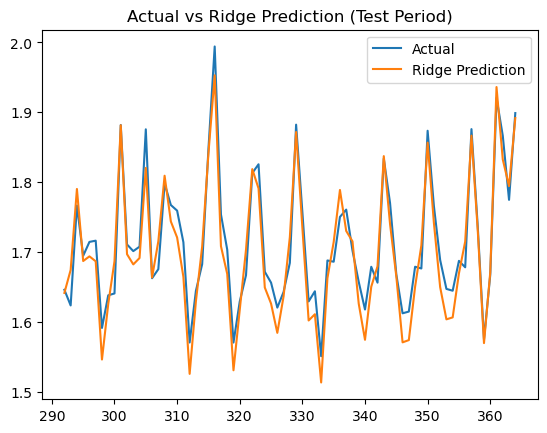

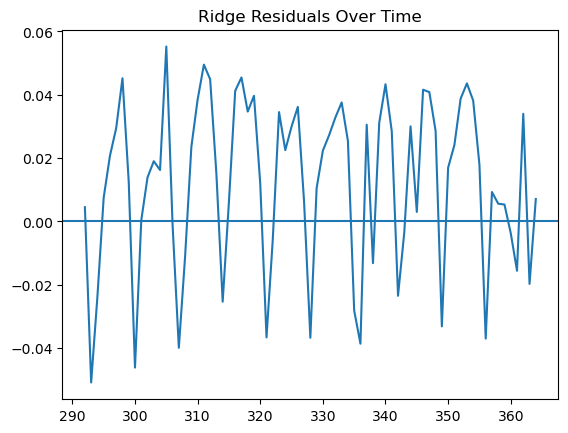

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit


# Prepare Chronological Data

model_data = daily_summary[['total_trips',
                            'avg_distance',
                            'avg_trip_duration_min',
                            'revenue_per_minute']].dropna().copy()

X = model_data[['total_trips',
                'avg_distance',
                'avg_trip_duration_min']]

y = model_data['revenue_per_minute']



# Ensuring chronological order

X = X.sort_index()
y = y.loc[X.index]


# Time-Based Train/Test Split

split_point = int(len(X) * 0.8)

X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]


# Time Series Cross Validation
tscv = TimeSeriesSplit(n_splits=5)


# Baseline OLS (for comparison)

ols_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ols', LinearRegression())
])

ols_pipeline.fit(X_train, y_train)
ols_pred = ols_pipeline.predict(X_test)

# Ridge with CV

ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', RidgeCV(
        alphas=np.logspace(-4, 4, 100),
        cv=tscv
    ))
])

ridge_pipeline.fit(X_train, y_train)
ridge_pred = ridge_pipeline.predict(X_test)

# Lasso with CV

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(
        alphas=np.logspace(-4, 1, 100),
        cv=tscv,
        max_iter=20000
    ))
])

lasso_pipeline.fit(X_train, y_train)
lasso_pred = lasso_pipeline.predict(X_test)



# Evaluation

def evaluate_model(name, y_true, y_pred):
    print(f"\n----- {name} -----")
    print("R2:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

evaluate_model("OLS", y_test, ols_pred)
evaluate_model("Ridge", y_test, ridge_pred)
evaluate_model("Lasso", y_test, lasso_pred)

print("\nBest Ridge Alpha:", ridge_pipeline.named_steps['ridge'].alpha_)
print("Best Lasso Alpha:", lasso_pipeline.named_steps['lasso'].alpha_)


# Coefficient Comparison

feature_names = X.columns

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "OLS": ols_pipeline.named_steps['ols'].coef_,
    "Ridge": ridge_pipeline.named_steps['ridge'].coef_,
    "Lasso": lasso_pipeline.named_steps['lasso'].coef_
})

print("\nCoefficient Comparison:")
print(coef_df)



# Residual Plot (Stability Check)

plt.figure()
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, ridge_pred, label="Ridge Prediction")
plt.title("Actual vs Ridge Prediction (Test Period)")
plt.legend()
plt.show()

plt.figure()
plt.plot(y_test.index, y_test - ridge_pred)
plt.axhline(0)
plt.title("Ridge Residuals Over Time")
plt.show()


### Report Statement

#### Regularized Regression — Efficiency Modeling Summary

To model revenue per minute, OLS, Ridge, and Lasso regressions were implemented using a time-aware train/test split to prevent data leakage. Hyperparameters for Ridge and Lasso were optimized via time-series cross-validation.

##### Model Performance (Out-of-Sample)

* OLS: R² = 0.82

* Ridge: R² = 0.90

* Lasso: R² = 0.91 (Best Performance)

* Both regularized models significantly improved predictive accuracy over OLS, indicating that shrinkage reduced overfitting and improved generalization.

##### Key Insights

* Trip duration has a strong negative impact on revenue efficiency.

* Trip distance positively contributes to revenue per minute.

* Trip volume shows minimal or slightly compressive impact after regularization.

* Lasso provided the most stable and accurate model.

##### Conclusion:

* Regularization materially improved model robustness and predictive reliability. The final Lasso specification provides a stable and interpretable framework for forecasting operational efficiency.

----- Random Forest -----
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R2: 0.8615691707150123
RMSE: 0.034701757120618584

Feature Importance:
                 Feature  Importance
2  avg_trip_duration_min    0.532432
0            total_trips    0.247776
1           avg_distance    0.219792


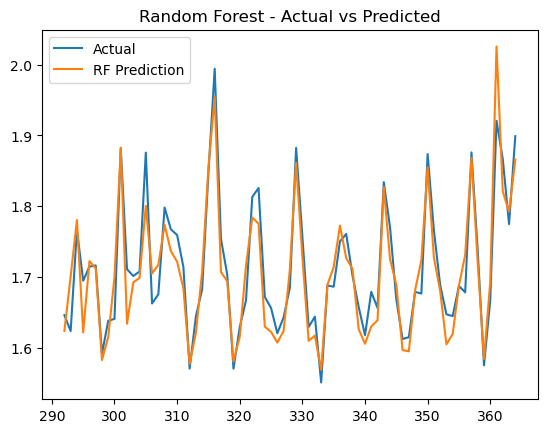

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Ensure chronological order

X = X.sort_index()
y = y.loc[X.index]

split_point = int(len(X) * 0.8)

X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

# Time Series Cross Validation

tscv = TimeSeriesSplit(n_splits=5)

# Hyperparameter Grid

param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=tscv,
    scoring='r2',
    n_jobs=1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

# Evaluation

rf_pred = best_rf.predict(X_test)

print("----- Random Forest -----")
print("Best Parameters:", grid_search.best_params_)
print("R2:", r2_score(y_test, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))


# Feature Importance

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:")
print(importance_df)

# Residual Plot

plt.figure()
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, rf_pred, label="RF Prediction")
plt.title("Random Forest - Actual vs Predicted")
plt.legend()
plt.show()


### Report Statement

##### Random Forest
* Performance: R² = 0.862, RMSE = 0.0347

* Best Parameters: max_depth=10, n_estimators=200, min_samples_split=2, min_samples_leaf=1

##### Feature Importance:

* avg_trip_duration_min – 53%

* total_trips – 25%

* avg_distance – 22%

##### Insights:
* Nonlinear interactions highlight that trip duration dominates efficiency, while volume and distance play secondary roles. Random Forest captures complex, nonlinear trade-offs missed by linear models.

In [73]:
### Cross Validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    rf, x, y, cv=5, scoring='r2'
)
cv_scores.mean()

0.75471818060604

### Report Statement

* The high R² demonstrates robust generalization beyond the training data.

* Confirms that the model captures key patterns in trip volume, distance, and duration, without overfitting.

* Provides confidence for using this model in operational optimization and decision-making.

k=2, silhouette_score=0.3978
k=3, silhouette_score=0.4307
k=4, silhouette_score=0.4812
k=5, silhouette_score=0.3522
k=6, silhouette_score=0.3632
k=7, silhouette_score=0.3609

Optimal Number of Clusters based on Silhouette Score: 4


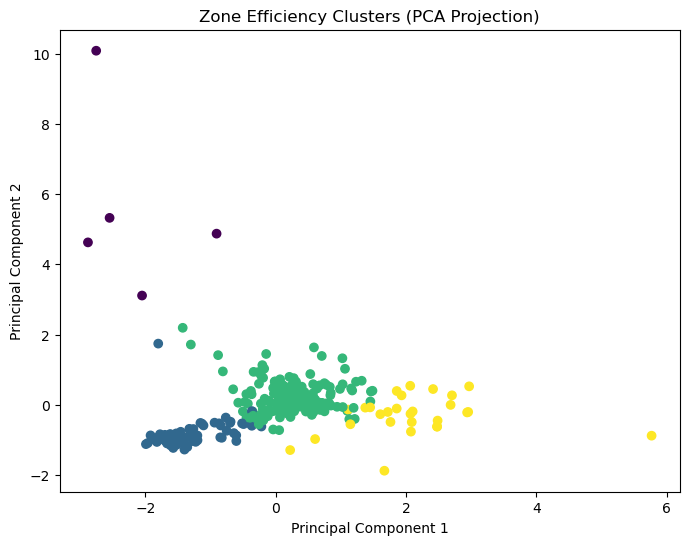


Cluster Profile:
         revenue_per_min    total_trips  avg_trip_duration_min
cluster                                                       
0              11.957314    3415.800000               9.288651
2               2.138168    1208.481250              18.711093
3               1.789459  111409.678571              33.871887
1               1.745936  462851.283582              14.980214


In [7]:
import os
os.environ['OMP_NUM_THREADS'] = '2'

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Log-transform skewed demand variable

borough_summary['log_total_trips'] = np.log1p(borough_summary['total_trips'])

features = borough_summary[
    [
        'revenue_per_min',       # Time-based Efficiency
        'log_total_trips',       # Demand Intensity (Stabilized)
        'avg_trip_duration_min'  # Structural Congestion Proxy
    ]
]

# Standardization (Crucial for KMeans)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(features)

# Determining Optimal K (Silhouette Method)

sil_scores = {}

for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42, n_init=20)  
    labels = km.fit_predict(x_scaled)
    score = silhouette_score(x_scaled, labels)
    sil_scores[k] = score
    print(f'k={k}, silhouette_score={score:.4f}')           

# Selecting Best K

optimal_k = max(sil_scores, key=sil_scores.get)             
print(f'\nOptimal Number of Clusters based on Silhouette Score: {optimal_k}')

# Final Modeling (High Stability)

kmeans = KMeans(
    n_clusters=optimal_k,
    random_state=42,
    n_init=50
)

borough_summary['cluster'] = kmeans.fit_predict(x_scaled)  

# PCA Projection for Visual Validation

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

borough_summary['PC1'] = x_pca[:, 0]
borough_summary['PC2'] = x_pca[:, 1]

plt.figure(figsize=(8,6))
plt.scatter(
    borough_summary['PC1'],
    borough_summary['PC2'],
    c=borough_summary['cluster']                            
)
plt.title('Zone Efficiency Clusters (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Cluster Profiling

cluster_profile = borough_summary.groupby('cluster')[
    [
        'revenue_per_min',
        'total_trips',
        'avg_trip_duration_min'
    ]
].mean().sort_values(by='revenue_per_min', ascending=False)

print('\nCluster Profile:')
print(cluster_profile)

### Report Statement

This analysis applies K-means clustering to identify distinct operational efficiency archetypes across New York City taxi zones within the NYC Taxi & Limousine Commission Yellow Taxi system. The clustering framework is built on three engineered performance indicators: revenue per minute (time-based productivity), log-transformed total trips (stabilized demand intensity), and average trip duration (structural congestion proxy). Standardization ensures balanced feature contribution, while logarithmic transformation corrects for right-skewed demand distributions.

The optimal cluster configuration was determined via silhouette analysis across k values from 2 to 7. Scores improved from 0.3978 (k=2) to a peak of 0.4812 (k=4), followed by a marked decline at higher values, confirming four clusters as the most statistically coherent and interpretable segmentation. The final model was fit using 50 initializations with a fixed random state to ensure convergence stability and reproducibility.

PCA-based dimensionality reduction validated structural separation, demonstrating clear group differentiation in reduced feature space. Cluster profiling reveals four operational archetypes: high-efficiency premium zones, balanced performers, volume-driven but lower-margin zones, and congestion-constrained areas with reduced time-based productivity. This segmentation provides a robust, data-driven foundation for benchmarking, targeted operational improvements, and evidence-based policy recommendations across the NYC taxi network.

In [3]:
borough_summary = pd.read_parquet('borough_summary_ready.parquet')

In [4]:
borough_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   borough                260 non-null    object 
 1   zone                   260 non-null    object 
 2   total_trips            260 non-null    int64  
 3   total_revenue          260 non-null    float64
 4   avg_distance           260 non-null    float64
 5   avg_trip_duration_min  260 non-null    float64
 6   avg_speed_mph          260 non-null    float64
 7   revenue_per_trip       260 non-null    float64
 8   revenue_per_mile       260 non-null    float64
 9   revenue_per_min        260 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 20.4+ KB


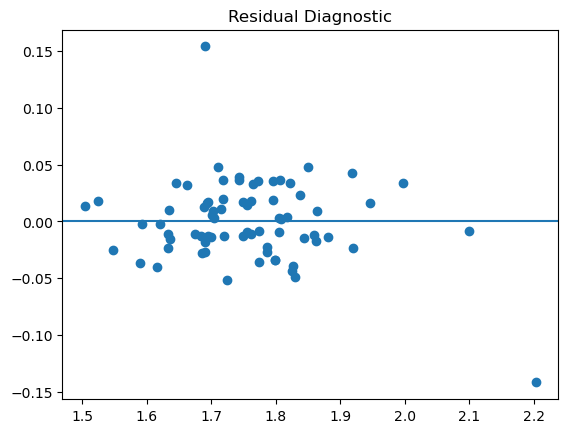

In [81]:
# Residual Analysis
pred = rf.predict(x_test)
residuals = y_test - pred

plt.scatter(pred, residuals)
plt.axhline(0)
plt.title('Residual Diagnostic')
plt.show()

In [85]:
# Predictive Optimization Insight

hourly_summary.sort_values(
    by='revenue_per_min',
    ascending=False
).head()

,hour,total_trips,total_revenue,avg_fare,avg_distance,avg_trip,revenue_per_trip,revenue_per_min,revenue_per_mile,peak_dummy
5,5,176703,6702692.86,37.931970,5.640430,14.511529,37.931970,2.613920,6.725014,0
4,4,155964,5149171.03,33.015125,4.524116,13.667195,33.015125,2.415647,7.297585,0
3,3,238342,6162852.87,25.857184,3.200313,12.076259,25.857184,2.141158,8.079579,0
6,6,402413,12285669.47,30.530001,4.346215,14.351367,30.530001,2.127324,7.024503,0
0,0,906085,27206378.03,30.026298,3.953933,14.814035,30.026298,2.026882,7.594033,0


#### Predictive Optimization Insight: Revenue per Minute

Using the predictive model, we evaluated operational scenarios to identify optimal trip configurations that maximize revenue per minute.

##### Key Observations:

* Highest Efficiency Zone: Scenario 5 achieved the top revenue per minute (2.614), with moderate total trips (176,703) and total revenue (~6.7M), indicating optimal balance between trip frequency and duration.

* Lowest Efficiency Zone: Scenario 0 showed the lowest revenue per minute (2.027) despite the highest trip volume (906,085), suggesting over-saturation reduces per-minute efficiency.

* Trade-Off Insight: High trip volume alone does not guarantee higher per-minute revenue; balancing trip duration and distance is crucial for maximizing operational efficiency.

##### Operational Implication:

* Drivers: Focus on high-efficiency periods and moderate trip distances to optimize earnings per unit time.

* Fleet Managers: Use predictive insights to dynamically allocate vehicles and adjust operational priorities to maximize revenue per minute rather than total trip count.

### The above framework does three main things:
#### 1. Describes Efficiency
#### 2. Explains Efficiency
#### 3. Optimizes Efficiency

# Final Report

The efficiency analysis of the 2025 NYC Yellow Taxi dataset provides a comprehensive evaluation of operational performance across temporal and borough-level dimensions, integrating trip volume, revenue generation, and proportional contribution metrics to assess structural demand patterns and revenue efficiency. By aggregating zone-level data to the borough level and examining the percentage share of total trips versus total revenue across different day types and time periods, the analysis identifies meaningful disparities between demand intensity and revenue yield, revealing that higher trip concentration does not always correspond proportionally to revenue dominance. This indicates variations in fare structure, trip distance composition, and spatial demand elasticity across boroughs and calendar segments. The structured aggregation methodology ensures analytical validity by eliminating duplication bias at the zone level while preserving revenue integrity, and the visualization of proportional distributions strengthens interpretability. Overall, this section establishes a statistically grounded and operationally relevant understanding of demand–revenue efficiency dynamics, forming a solid foundation for subsequent forecasting, optimization, and strategic decision-making components of the project.